In [2]:
import pandas as pd

In [3]:
raw = pd.read_csv('http://hilpisch.com/pyalgo_eikon_eod_data.csv', index_col=0, parse_dates=True).dropna()

In [4]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2516 entries, 2010-01-04 to 2019-12-31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL.O  2516 non-null   float64
 1   MSFT.O  2516 non-null   float64
 2   INTC.O  2516 non-null   float64
 3   AMZN.O  2516 non-null   float64
 4   GS.N    2516 non-null   float64
 5   SPY     2516 non-null   float64
 6   .SPX    2516 non-null   float64
 7   .VIX    2516 non-null   float64
 8   EUR=    2516 non-null   float64
 9   XAU=    2516 non-null   float64
 10  GDX     2516 non-null   float64
 11  GLD     2516 non-null   float64
dtypes: float64(12)
memory usage: 255.5 KB


In [5]:
data = pd.DataFrame(raw['EUR='])

In [6]:
data.rename(columns={'EUR=': 'price'}, inplace=True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2516 entries, 2010-01-04 to 2019-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   2516 non-null   float64
dtypes: float64(1)
memory usage: 39.3 KB


In [8]:
data['SMA1'] = data['price'].rolling(42).mean()

data['SMA2'] = data['price'].rolling(252).mean()

data.tail()

,price,SMA1,SMA2
Date,,,
2019-12-24,1.1087,1.107698,1.119630
2019-12-26,1.1096,1.107740,1.119529
2019-12-27,1.1175,1.107924,1.119428
2019-12-30,1.1197,1.108131,1.119333
2019-12-31,1.1210,1.108279,1.119231


/var/folders/q5/2xv_4q6s1_j5hl_jlwf6sc880000gn/T/ipykernel_59324/240870172.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


<Axes: title={'center': 'EUR/USD | 42 & 252 days SMAs'}, xlabel='Date'>

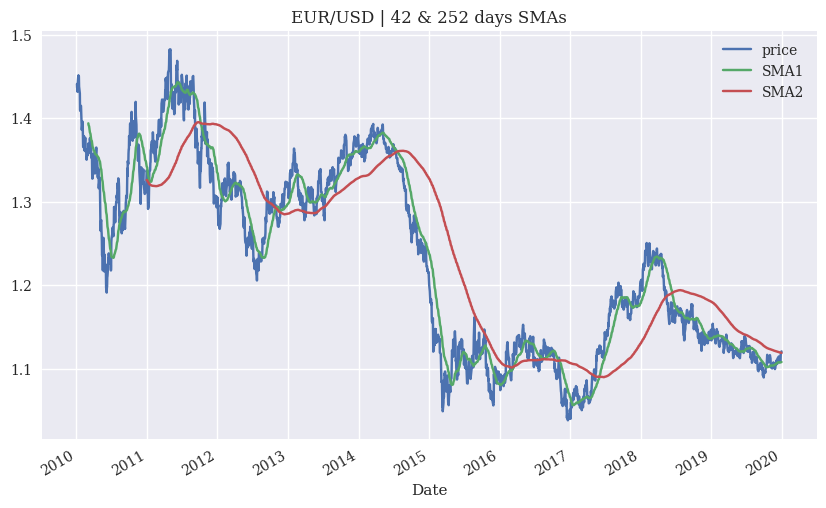

In [9]:
%matplotlib inline
from pylab import mpl, plt
plt.style.use('seaborn')
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['font.family'] = 'serif'
data.plot(title='EUR/USD | 42 & 252 days SMAs', figsize=(10,6))

<Axes: title={'center': 'Market Positioning'}, xlabel='Date'>

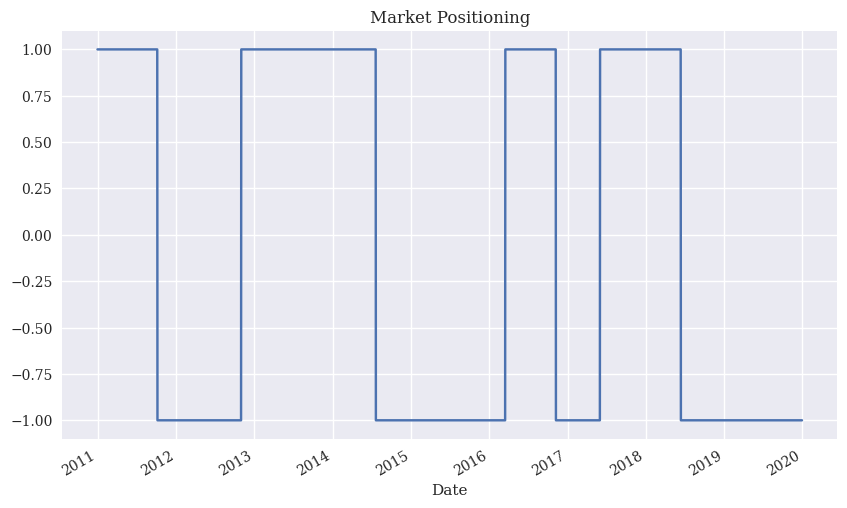

In [11]:
import numpy as np
data['position'] = np.where(data['SMA1'] > data['SMA2'], 1, -1)
data.dropna(inplace=True)
data['position'].plot(ylim=[-1.1, 1.1], title='Market Positioning', figsize=(10,6))

<Axes: >

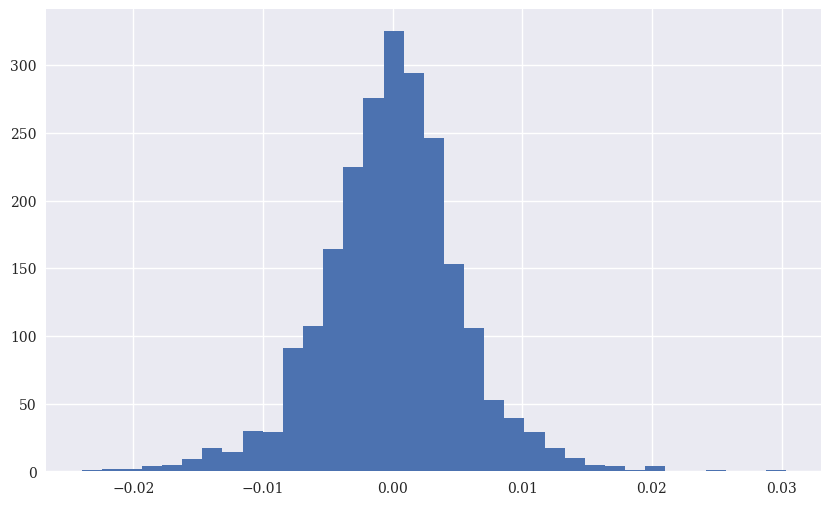

In [12]:
data['returns'] = np.log(data['price'] / data['price'].shift(1))
data['returns'].hist(bins=35, figsize=(10,6))

In [15]:
data['strategy'] = data['position'].shift(1) * data['returns']
print(data[['returns', 'strategy']].sum())

print(data[['returns', 'strategy']].sum().apply(np.exp))

returns    -0.176731
strategy    0.253121
dtype: float64
returns     0.838006
strategy    1.288039
dtype: float64


Gross performance of EUR/USD compared to the SMA-based strategy:

<Axes: xlabel='Date'>

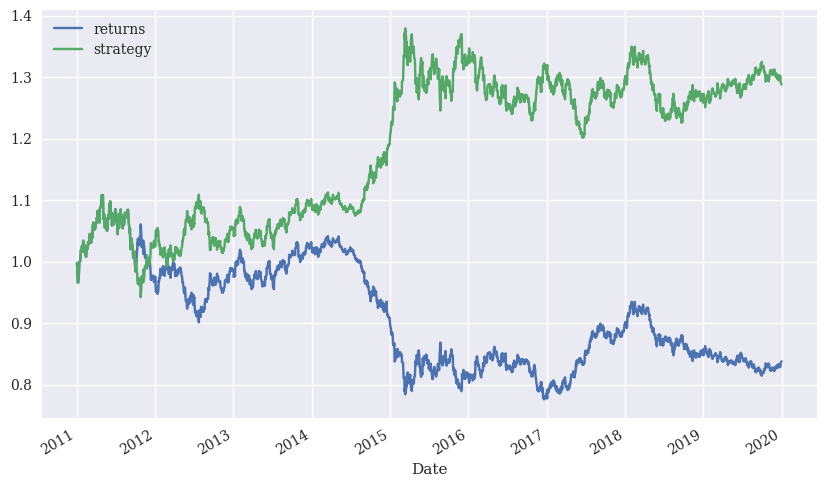

In [16]:
data[['returns', 'strategy']].cumsum().apply(np.exp).plot(figsize=(10,6))

Annualized mean return in both log and regular space:

Annualized standard deviation in both log and regular space:

In [17]:
print(data[['returns', 'strategy']].mean() * 252)

print(np.exp(data[['returns', 'strategy']].mean() * 252) -1)

print(data[['returns', 'strategy']].std() * 252 ** 0.5)

print((data[['returns', 'strategy']].apply(np.exp) -1).std() * 252 ** 0.5)

returns    -0.019671
strategy    0.028174
dtype: float64
returns    -0.019479
strategy    0.028575
dtype: float64
returns     0.085414
strategy    0.085405
dtype: float64
returns     0.085405
strategy    0.085373
dtype: float64


<Axes: xlabel='Date'>

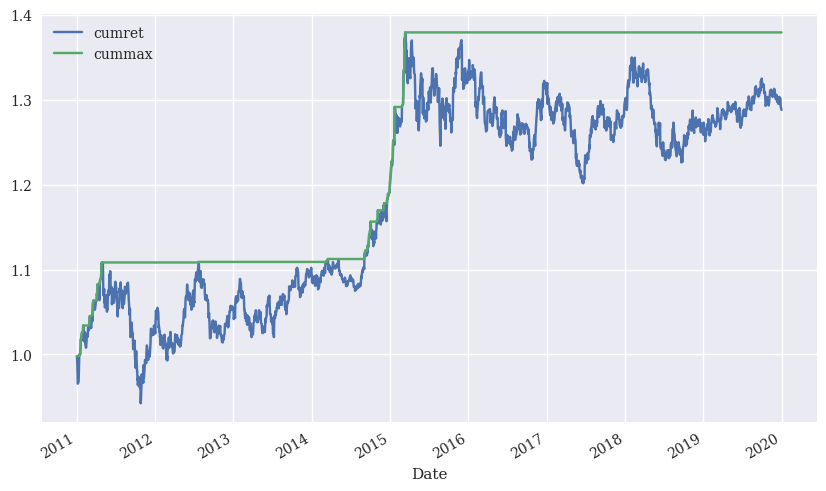

In [18]:
data['cumret'] = data['strategy'].cumsum().apply(np.exp)

data['cummax'] = data['cumret'].cummax()

data[['cumret', 'cummax']].dropna().plot(figsize=(10,6))

In [19]:
drawdown = data['cummax'] - data['cumret']

drawdown.max()

0.17779367070195895

In [20]:
temp = drawdown[drawdown == 0]

periods = (temp.index[1:].to_pydatetime() - temp.index[:-1].to_pydatetime())

periods[12:15]

array([datetime.timedelta(days=1), datetime.timedelta(days=1),
       datetime.timedelta(days=10)], dtype=object)

In [22]:
periods.max()

datetime.timedelta(days=596)